In [1]:
import numpy
from scipy.signal import correlate
import numpy as np 
import matplotlib.pyplot as plt
plt.ion()
# Loads nicard and scope
manager.startModule('logic','cavitylogic')
import glob

In [2]:
filenames = glob.glob('./*.dat')
print(filenames)
fileNum=3
#cavitylogic._load_full_sweep(filepath='', filename=filenames[fileNum])

['.\\2017-08-15_144400_full_sweep_data_calibrationOfStage.dat', '.\\2017-08-15_150436_full_sweep_data_calibration2.dat', '.\\2017-08-15_151042_full_sweep_data.dat', '.\\2017-08-15_151505_full_sweep_data.dat', '.\\2017-08-15_151553_full_sweep_data.dat', '.\\2017-08-15_151659_full_sweep_data.dat']


In [3]:
# Load datasets, taking mean of 100 values in each table row
A = numpy.loadtxt("2017-08-15_151553_full_sweep_data.dat")[1]
B = numpy.loadtxt("2017-08-15_151505_full_sweep_data.dat")[1]


A = np.split(A,2)[0][100000:]
B = np.split(B,2)[0][100000:]



# regularize datasets by subtracting mean and dividing by s.d.
A -= A.mean(); A /= A.std()
B -= B.mean(); B /= B.std()


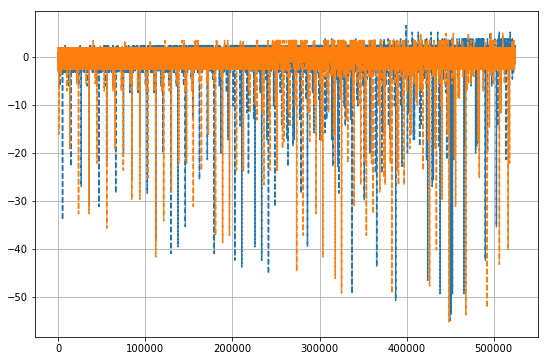

In [13]:
low, high = 200000,300000
plt.plot(A,'--',B,'--')
plt.grid()
#plt.xlim([low,high])
#plt.ylim(2.6,3.2)
plt.show()

In [14]:
Atest=A[low:high]
Btest=A[low:high]

#Atest[np.where(np.abs(Atest) < 3* A.std())] = 0.0
#Btest[np.where(np.abs(Btest) < 3* B.std())] = 0.0
#Atest[np.where(Atest > 0.0)] = 0.0
#Btest[np.where(Btest > 0.0)] = 0.0
# Put in an artificial time shift between the two datasets
time_shift = 27047
Atest = numpy.roll(Atest, time_shift)
nsamples = Atest.size
Btest_sam = 5 * np.random.normal(size=(nsamples,))
Btest +=Btest_sam

In [15]:
# Find cross-correlation
xcorr = correlate(Atest, Btest)

In [16]:
# delta time array to match xcorr

dt = numpy.arange(1-nsamples, nsamples)

mid = int(len(dt)/2)
one_fsr = int(len(Atest)/1)

recovered_time_shift = dt[xcorr.argmax()]

print("Added time shift: {}".format(time_shift))
print("Recovered time shift: {}".format(recovered_time_shift))

# SAMPLE OUTPUT:
# Added time shift: 20
# Recovered time shift: 20

Added time shift: 27047
Recovered time shift: 27047


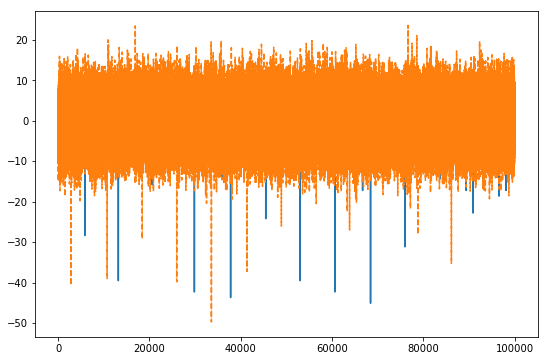

In [17]:
plt.plot(Atest,'-',Btest,'--')
plt.show()

In [18]:
Btest -= Btest_sam
Btest = numpy.roll(Btest, time_shift)


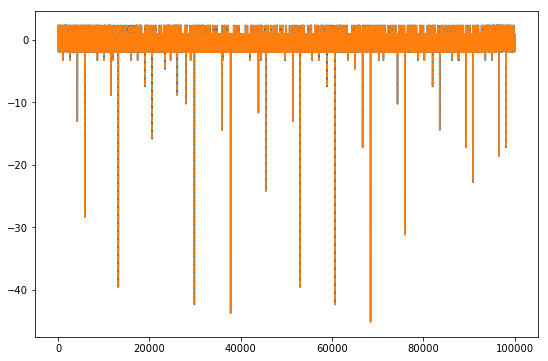

In [19]:
plt.plot(Atest,'-',Btest,'--')
plt.show()

In [11]:
dt[xcorr.argmax()]

27047

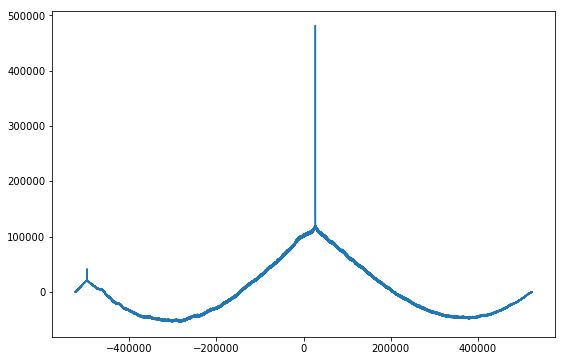

In [12]:
plt.plot(dt,xcorr)
plt.show()